In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

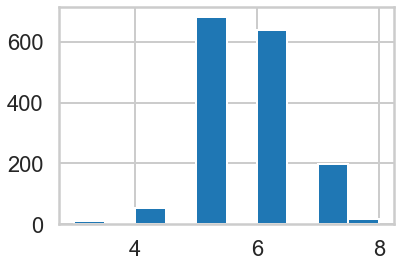

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.12825860271115747
% Good wines in Testing: 0.146875


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.43184117442597475 {'mean_fit_time': array([0.0028687 , 0.00167661, 0.00171466, 0.00192318, 0.0015945 ,
       0.00154252, 0.00187693, 0.00268426, 0.00142093, 0.00123253,
       0.00122342, 0.00132084, 0.00173969, 0.00215569, 0.00173841,
       0.00220585, 0.00136786, 0.00280471, 0.00113392, 0.00156922,
       0.00225329, 0.00201111, 0.00255003, 0.00274878, 0.00236297,
       0.002387  , 0.00287633, 0.00287676, 0.00175042, 0.00235324,
       0.00145421, 0.00187917, 0.00190301, 0.00277462, 0.00234413,
       0.00155663, 0.00209889, 0.00189481, 0.0027874 , 0.00206103,
       0.00149946, 0.00224938]), 'std_fit_time': array([0.00124012, 0.00039813, 0.00070781, 0.00018724, 0.0006706 ,
       0.0004452 , 0.00029697, 0.00104362, 0.00050199, 0.00078825,
       0.00079041, 0.00076885, 0.000459  , 0.00064128, 0.00050685,
       0.00088969, 0.00078272, 0.00082454, 0.00107166, 0.00151495,
       0.00161234, 0.00180271, 0.00209158, 0.0018589 

c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


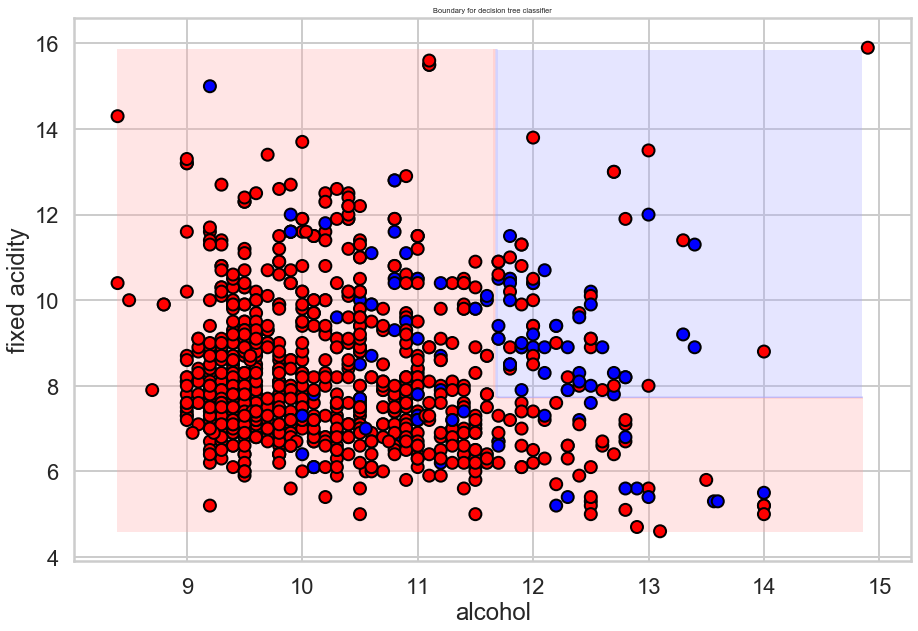

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

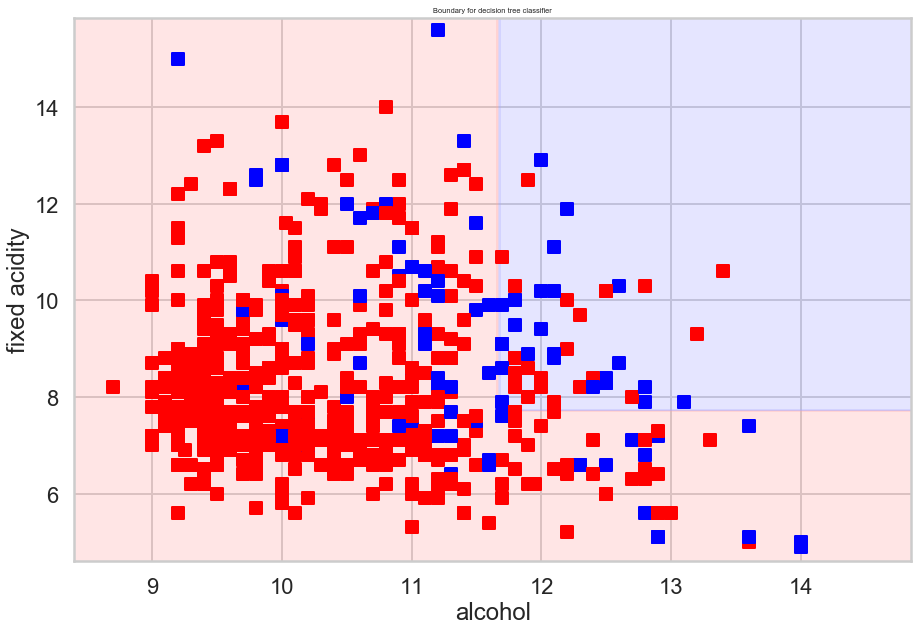

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 5} 0.2966984874030904 {'mean_fit_time': array([0.00174389, 0.00188575, 0.00311656]), 'std_fit_time': array([0.00088259, 0.00186047, 0.00168983]), 'mean_score_time': array([0.00218024, 0.00176611, 0.00106416]), 'std_score_time': array([0.00142333, 0.00197452, 0.00087143]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.24242424, 0.21621622, 0.26315789]), 'split1_test_score': array([0.29090909, 0.26923077, 0.31372549]), 'split2_test_score': array([0.3       , 0.48979592, 0.29268293]), 'split3_test_score': array([0.33333

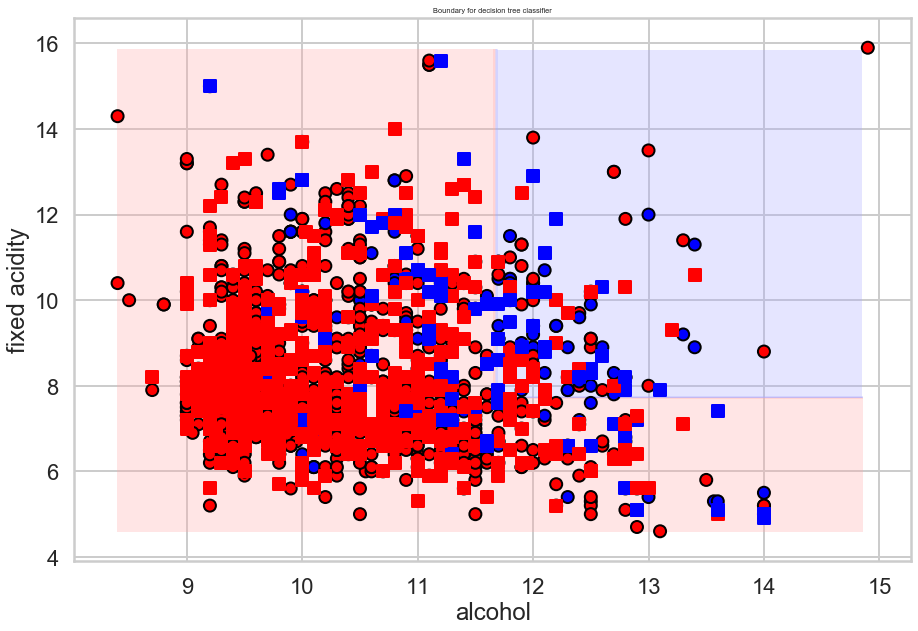

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.3992039829834535 {'mean_fit_time': array([0.00195937, 0.00118866, 0.00213199, 0.00143056, 0.00174508,
       0.0023983 , 0.00197434, 0.00172415, 0.00226917, 0.00262494,
       0.00301232, 0.00335374, 0.00370579, 0.0034658 , 0.00392866,
       0.00452857, 0.00344224, 0.00336208, 0.00449119, 0.00320878,
       0.00430746, 0.00464325, 0.00428495, 0.00519476, 0.00458369,
       0.00411348, 0.0049067 , 0.00551834, 0.0045032 , 0.00429034,
       0.00613313, 0.00701289, 0.00669212, 0.004985  , 0.00531363,
       0.00438538, 0.00495367, 0.00440111, 0.00624962, 0.00526776,
       0.00654697, 0.00672116, 0.00633168, 0.00513721, 0.00774913,
       0.00595341, 0.00669351, 0.00586605, 0.00671396, 0.00330291,
       0.00758038, 0.00598936, 0.00717711, 0.00717449, 0.00531549,
       0.00639229, 0.00633254, 0.00692692, 0.00452628, 0.0063036 ,
       0.00761609, 0.006952  , 0.00753918, 0.00720291, 0.00709257,
       0.0063931 , 0.00593734, 0.006

c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 15} 0.3655838691094249 {'mean_fit_time': array([0.00463219, 0.00604978, 0.01253214, 0.01686845, 0.01907949,
       0.02447791, 0.03166928, 0.03389053, 0.03808365, 0.04338951,
       0.04556642, 0.05030117, 0.0549336 , 0.04683051, 0.05237789,
       0.07115121, 0.05804329, 0.06021714, 0.07274928]), 'std_fit_time': array([0.00097284, 0.0018127 , 0.00152223, 0.00200574, 0.00204739,
       0.00354652, 0.00364043, 0.00421285, 0.00427506, 0.00354774,
       0.00465662, 0.00387481, 0.00463807, 0.00632459, 0.0070374 ,
       0.00421312, 0.00373219, 0.00409186, 0.00335657]), 'mean_score_time': array([0.00254607, 0.00351553, 0.00196643, 0.00323334, 0.00392561,
       0.00379286, 0.00493045, 0.00455012, 0.0052484 , 0.00530267,
       0.00550628, 0.00604458, 0.0050663 , 0.00661716, 0.00482478,
       0.00704455, 0.00500455, 0.00611672, 0.00643187]), 'std_score_time': array([0.00086948, 0.00226633, 0.0012509 , 0.00175443, 0.00090532,
       0.00063108, 0.00113683, 0

c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


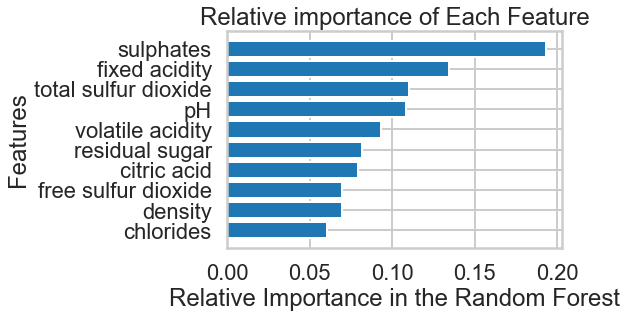

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 10} 0.36955872856273136 {'mean_fit_time': array([0.04028363, 0.03880553, 0.043326  , 0.04494219, 0.04879646,
       0.05239334, 0.05557261, 0.0605865 , 0.06128697, 0.06429911,
       0.06832767, 0.07303381, 0.0748179 , 0.07710729, 0.08274517,
       0.08552814, 0.08861485, 0.09123945, 0.09527974, 0.10008349,
       0.10102706, 0.10593276, 0.10655446, 0.11324387, 0.11277509,
       0.1161283 , 0.12588005, 0.12480822, 0.1292491 , 0.1302979 ,
       0.13701115, 0.14128489, 0.14068274, 0.14765911, 0.14699717,
       0.15195322, 0.15334225, 0.15618205, 0.16206346, 0.16406717,
       0.17109995, 0.17064638, 0.17391562, 0.17681308, 0.18172245,
       0.18624949, 0.18946409, 0.19914346, 0.19795108, 0.19691868]), 'std_fit_time': array([0.00210941, 0.00157931, 0.00295773, 0.00143288, 0.00251478,
       0.00188793, 0.00189748, 0.00400039, 0.00522503, 0.00487587,
       0.00371738, 0.00552752, 0.00412584, 0.00273086, 0.00433221,
       0.00322892, 0.00349235, 0.002

c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\siddhartha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 3, 'n_estimators': 49} 0.34979667658195157 {'mean_fit_time': array([0.04289584, 0.03869791, 0.03570347, 0.03297472, 0.03976645,
       0.03863873, 0.03528938, 0.03852944, 0.0384254 , 0.04099464,
       0.03929753, 0.04269552, 0.04171162, 0.04560246, 0.05179911,
       0.04816651, 0.04929185, 0.05256281, 0.0484479 , 0.05161858,
       0.05401387, 0.05264463, 0.05679269, 0.05684409, 0.05883818,
       0.05980973, 0.06132569, 0.06176291, 0.06475468, 0.06463294,
       0.04842205, 0.04879498, 0.05125299, 0.05337272, 0.05011301,
       0.05621734, 0.05587292, 0.05781178, 0.06009717, 0.06356573,
       0.06772947, 0.06271582, 0.06262164, 0.06432071, 0.06582351,
       0.06808043, 0.0703186 , 0.06944618, 0.07087073, 0.07347975,
       0.07999759, 0.08178811, 0.08294425, 0.08393202, 0.07972822,
       0.08050485, 0.08692384, 0.08612027, 0.0893961 , 0.08911257,
       0.06670647, 0.07131124, 0.07173247, 0.07237477, 0.07460394,
       0.07706938, 0.07772384, 0.07907143, 0.0836

[[521  25]
 [ 56  38]]
########################################################


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

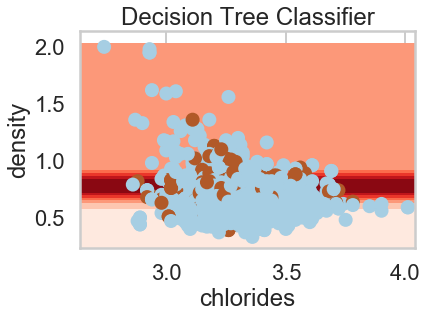

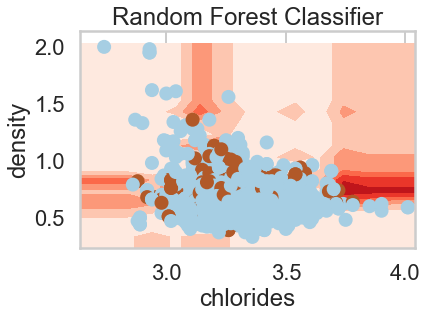

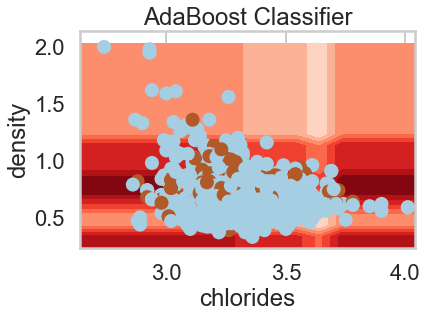

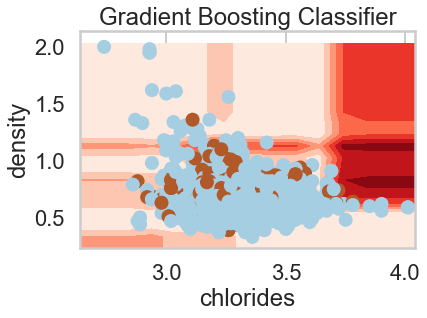

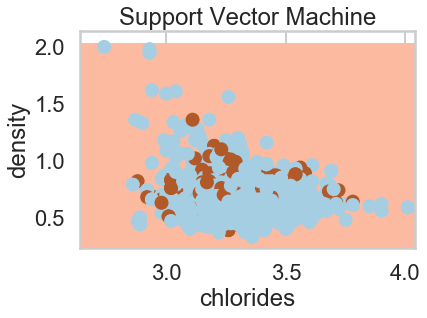

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
1574    0
1575    0
1576    0
1577    0
1578    0
1579    0
1580    0
1581    0
1582    0
1583    0
1584    1
1585    0
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32